In [65]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

data = load_wine()

df = pd.DataFrame(data['data'],columns=data['feature_names'])

df = df[['alcohol','malic_acid']]

In [40]:
df.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [1]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers =('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors [ : len (np.unique(y))])

    # plot the decision surface
    x1_min, x1_max= X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array( [xx1.ravel(), xx2. ravel()]).T)
    Z = Z. reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors [idx],
                        marker=markers [idx],
                        label=cl,
                        edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test [:, 0],
                        X_test [:, 1],
                        c=' ',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        S=100,
                        label='test set ')

## SVM

In [41]:
#svm
svm = SVC(kernel='linear')
svm.fit(df.values,data['target'])
svm_predict = svm.predict(df.values)
svm.score(df.values,data['target'])

0.7808988764044944

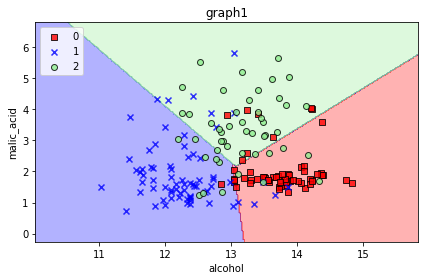

In [92]:
plot_decision_regions(df.values, data['target'], classifier=svm, test_idx=None, resolution=0.02)
plt.legend(loc='upper left')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('graph1')
plt.tight_layout()

## rbf

### gamma = 0.7

In [71]:
#svm_rbf
svm_rbf = SVC(kernel='rbf', gamma= 0.7)
svm_rbf.fit(df.values,data['target'])
svmrbf_predict = svm_rbf.predict(df.values)
svm_rbf.score(df.values,data['target'])

0.8370786516853933

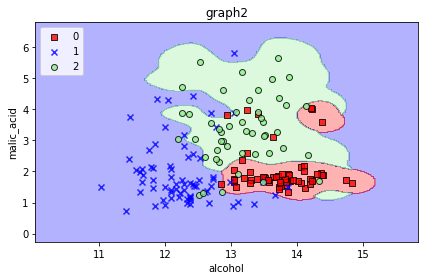

In [93]:
plot_decision_regions(df.values, data['target'], classifier=svm_rbf, test_idx=None, resolution=0.02)
plt.legend(loc='upper left')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('graph2')
plt.tight_layout()

### gamma = 0.1

0.8314606741573034


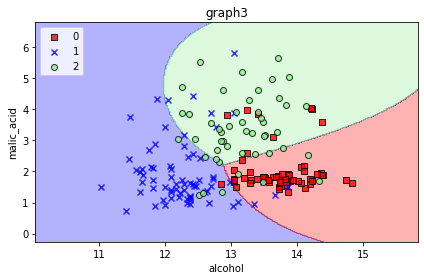

In [99]:
#svm_rbf 0.1
svm_rbf = SVC(kernel='rbf', gamma= 0.1)
svm_rbf.fit(df.values,data['target'])
svmrbf_predict = svm_rbf.predict(df.values)
print(svm_rbf.score(df.values,data['target']))

plot_decision_regions(df.values, data['target'], classifier=svm_rbf, test_idx=None, resolution=0.02)
plt.legend(loc='upper left')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('graph3')
plt.tight_layout()

### gamma = 1

0.8426966292134831


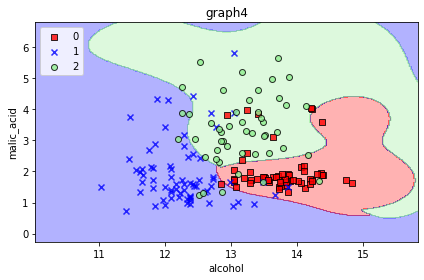

In [98]:
#svm_rbf 1
svm_rbf = SVC(kernel='rbf', gamma= 1)
svm_rbf.fit(df.values,data['target'])
svmrbf_predict = svm_rbf.predict(df.values)
print(svm_rbf.score(df.values,data['target']))

plot_decision_regions(df.values, data['target'], classifier=svm_rbf, test_idx=None, resolution=0.02)
plt.legend(loc='upper left')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('graph4')
plt.tight_layout()

### gamma = 10

0.8932584269662921


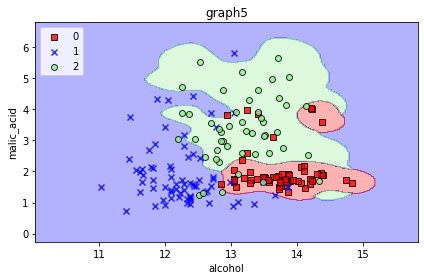

In [97]:
#svm_rbf 10
svm_rbf = SVC(kernel='rbf', gamma= 10)
svm_rbf.fit(df.values,data['target'])
svmrbf_predict = svm_rbf.predict(df.values)
print(svm_rbf.score(df.values,data['target']))

plot_decision_regions(df.values, data['target'], classifier=svm_rbf, test_idx=None, resolution=0.02)
plt.legend(loc='upper left')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('graph5')
plt.tight_layout()

## poly

In [88]:
#svm_poly
svm_poly = SVC(kernel='poly', degree= 3)
svm_poly.fit(df.values,data['target'])
svmpoly_predict = svm_poly.predict(df.values)
svm_poly.score(df.values,data['target'])

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8258426966292135

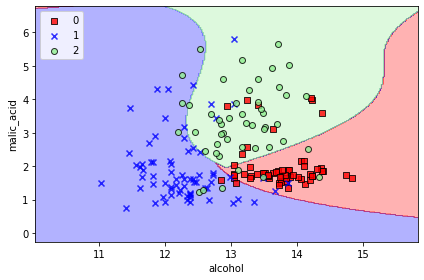

In [89]:
plot_decision_regions(df.values, data['target'], classifier=svm_poly, test_idx=None, resolution=0.02)
plt.legend(loc='upper left')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.tight_layout()

gpaph1:
kernel選用linear的時候決策邊界都會是直線

graph2：選用rbf很有可能不是多項式函數，代表當他分出決策區域有可能會形成一個封閉空間

graph3：可以看到當rbf的gamma很小的時候會很接近poly的分類結果，因為高次方項的參數很小，因此沒有辦法充分展現映射後的結果

graph4：可以看到rbf的gamma參數變大時決策邊界就會越來越限縮並且成為封閉界線

graph5：當gamma過大時就會有點類似overfitting

graph6：poly為多項是函數，這邊加了一個degree=3代表加了一個三次方項，所以才會有像S型的三次方多項式特徵出現，也因此跟linear差別只在決策邊界是曲線或是直線的差別

我們可以得知在gamma越小的時候決策邊界較為平滑,
<br>
而gamma越大的時候會非常的曲折,
<br>
也會越來越把同樣類別的點匡起來，因此才會越來越接近overfitting
<br>
因此我們在篩選gamma時需要選擇適當的值雖然gamma=10的時候準確率雖然到達0.89
<br>
但是也有很明顯的overfitting，因此要選第二個gamma=1，才是比較好的分類模型